In [2]:
import pandas as pd
import json
import sklearn.svm as svm
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import SelectFromModel
import numpy as np
from sklearn.neural_network import MLPClassifier
import script as sc
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [3]:
## Change the name to get your path
user = 'Andrew'

## Build test and train Datasets

In [3]:
# Rebuild complete dataset if necessary
sc.update_complete(user)

C:\Users\Andrew\Documents\CalPoly\DataCapstone\KineseItUp\script.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  observedData['index'] = range(len(observedData))


In [ ]:
data = pd.DataFrame(sc.get_complete(user))

In [7]:
data.head()

,Unnamed: 0,Unnamed: 0.1,mean.vm,sd.vm,mean.ang,sd.ang,p625,dfreq,ratio.df,start.time,...,activity,coding,type,last.1.mean.vm,last.1.sd.vm,last.1.mean.ang,last.1.sd.ang,last.1.p625,last.1.dfreq,last.1.ratio.df
0,0.0,368941.0,1.025459,0.052283,-13.663296,3.477743,0.072835,12.307692,0.072342,2017-10-06 16:44:00,...,active,non-sedentary,H-1,1.025459,0.052283,-13.663296,3.477743,0.072835,12.307692,0.072342
1,1.0,368942.0,1.019744,0.028089,-16.673945,2.361258,0.059919,9.230769,0.095085,2017-10-06 16:44:01,...,active,non-sedentary,H-1,1.025459,0.052283,-13.663296,3.477743,0.072835,12.307692,0.072342
2,2.0,368943.0,1.027147,0.026020,-6.451596,5.413729,0.216824,2.051282,0.179074,2017-10-06 16:44:02,...,active,non-sedentary,H-1,1.019744,0.028089,-16.673945,2.361258,0.059919,9.230769,0.095085
3,3.0,368944.0,1.049957,0.119535,-21.404693,23.206850,0.299554,2.051282,0.172340,2017-10-06 16:44:03,...,active,non-sedentary,H-1,1.027147,0.026020,-6.451596,5.413729,0.216824,2.051282,0.179074
4,4.0,368945.0,1.028554,0.049378,-69.353741,1.962348,0.130182,4.102564,0.067698,2017-10-06 16:44:04,...,active,non-sedentary,H-1,1.049957,0.119535,-21.404693,23.206850,0.299554,2.051282,0.172340


In [ ]:
# copy = data[['mean.vm','sd.vm','mean.ang','sd.ang','p625','dfreq','ratio.df']].copy(deep=True)
# copy.loc[-1] = copy.loc[0]  # adding a row
# copy.index = copy.index + 1  # shifting index
# copy.sort_index(inplace=True)
# copy.columns = 'last.' + copy.columns
# data = pd.concat([data, copy], axis = 1)
# data = data.drop(data.index[len(data)-1])
data = sc.get_lags(data, 1)

In [ ]:
trainX, trainY, testX, testY = sc.get_test_train(data,1)

In [9]:
dataH = data[data['type'].str.contains("H")]
dataE = data[data['type'].str.contains("E")]
dataL = data[data['type'].str.contains("L")]
dataA = data[data['type'].str.contains("A")]
dataW = data[data['type'].str.contains("W")]

In [10]:
trainXH, trainYH, testXH, testYH = sc.get_test_train(dataH, 0)
trainXE, trainYE, testXE, testYE = sc.get_test_train(dataE, 0)
trainXL, trainYL, testXL, testYL = sc.get_test_train(dataL, 0)
trainXA, trainYA, testXA, testYA = sc.get_test_train(dataA, 0)
trainXW, trainYW, testXW, testYW = sc.get_test_train(dataW, 0)

## Angle Cut Point Method

In [25]:
## create the cut point
def cut_point_classify(angle):
    if angle > -15 and angle < 15:
        return 'sedentary'
    else:
        return 'non-sedentary'

In [67]:
## use the cut point
pred = data['mean.ang'].apply(cut_point_classify)
## find accuracy
np.mean(pred == data['coding'])

0.51798949632894087

In [71]:
## use the cut point
predH = dataH['mean.ang'].apply(cut_point_classify)
## find accuracy
np.mean(predH == dataH['coding'])

0.74814402375649591

In [72]:
## use the cut point
predE = dataE['mean.ang'].apply(cut_point_classify)
## find accuracy
np.mean(predE == dataE['coding'])

0.61997719655875339

In [74]:
## use the cut point
predL = dataL['mean.ang'].apply(cut_point_classify)
## find accuracy
np.mean(predL == dataL['coding'])

0.2467454528667713

In [73]:
## use the cut point
predA = dataA['mean.ang'].apply(cut_point_classify)
## find accuracy
np.mean(predA == dataA['coding'])

0.61755601755601752

In [75]:
## use the cut point
predW = dataW['mean.ang'].apply(cut_point_classify)
## find accuracy
np.mean(predW == dataW['coding'])

0.31853438020461577

## SVM

In [9]:
clf = svm.SVC(cache_size=7000)

In [10]:
clf.fit(trainX,trainY)

SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
clf.score(testXH,testYH)

0.76466221232368226

In [11]:
clf.score(testXE,testYE)

0.66155334438916524

In [12]:
clf.score(testXL,testYL)

0.57034711964549478

In [13]:
clf.score(testXA,testYA)

0.81892091648189214

In [14]:
clf.score(testXW,testYW)

0.59935287400076132

In [11]:
clf.score(testX,testY)

0.7117851473679695

In [12]:
confusion_matrix(testY, clf.predict(testX))

array([[    0,   160,     0,     0,     3,    14,     0],
       [    0, 10571,     0,    89,   216,   855,     3],
       [    0,    98,     0,     2,     4,     3,     0],
       [    0,   196,     0,  1080,    64,   103,     0],
       [    0,   492,     0,   103,  1830,   322,     2],
       [    0,  1693,     0,   176,   358,  2953,    25],
       [    0,  1424,     0,     9,    94,   210,   157]], dtype=int64)

## Neural Network

In [11]:
n_net = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(1000, 500, 250, 125), 
                      random_state=1, verbose = True)
n_net.fit(trainX,trainY)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 500, 250, 125), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [28]:
np.sum(n_net.predict(testXH) == testYH) / len(testXH)

0.67427616926503342

In [30]:
np.sum(n_net.predict(testXE) == testYE) / len(testXE)

0.57144831398562745

In [32]:
np.sum(n_net.predict(testXL) == testYL) / len(testXL)

0.18537666174298376

In [33]:
np.sum(n_net.predict(testXA) == testYA) / len(testXA)

0.69401330376940129

In [35]:
np.sum(n_net.predict(testXW) == testYW) / len(testXW)

0.36676817662733158

In [18]:
predictedVals = n_net.predict(testX)
n_net.score(testX,testY)
# f1_score(testY, predictedVals)

0.73638738895662781

In [21]:
conf_mat = confusion_matrix(testY,predictedVals,testY.unique())

In [37]:
f1_score(testY,predictedVals,average='weighted')

C:\Users\Hans\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.70974126423006312

In [27]:
for i in range(7):
    print (conf_mat[i][i] / np.sum(conf_mat[i]),testY.unique()[i])

0.918856356356 active
0.574349775785 sitting still
0.127197039778 sitting with upper body movement
0.737987987988 lying
0.592735933313 sitting and typing
0.0 kneeling
0.0 Private / Not Coded


In [22]:
conf_mat,testY.unique()

(array([[14687,   967,    64,    68,   198,     0,     0],
        [ 1773,  3202,    66,   161,   373,     0,     0],
        [ 1449,   305,   275,    48,    85,     0,     0],
        [  176,   123,     5,   983,    45,     0,     0],
        [  613,   648,    26,    81,  1991,     0,     0],
        [  109,     2,     1,     1,     3,     0,     0],
        [  165,    11,     0,     0,     1,     0,     0]], dtype=int64),
 array(['active', 'sitting still', 'sitting with upper body movement',
        'lying', 'sitting and typing', 'kneeling', 'Private / Not Coded'], dtype=object))

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=0)
rf.fit(trainX,trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
rf.score(testXH,testYH)

0.7548255382331106

In [18]:
rf.score(testXE,testYE)

0.66680486456605859

In [19]:
rf.score(testXL,testYL)

0.34490398818316098

In [20]:
rf.score(testXA,testYA)

0.7889874353288987

In [21]:
rf.score(testXW,testYW)

0.59326227636086792

In [14]:
rf.score(testX,testY)

0.67222961087991762

## KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [24]:
knn.score(testXH,testYH)

0.75668151447661469

In [25]:
knn.score(testXE,testYE)

0.65823659480375896

In [26]:
knn.score(testXL,testYL)

0.61983013293943867

In [27]:
knn.score(testXA,testYA)

0.81596452328159641

In [28]:
knn.score(testXW,testYW)

0.57689379520365436

In [21]:
knn.score(testX,testY)

0.72671500278862244

In [17]:
## determining the optimal k value
acc = []
for i in range(5,100,5):
    neigh = KNeighborsClassifier(n_neighbors=i,weights = 'distance')
    neigh.fit(trainX,trainY)
    acc.append([i,neigh.score(testX,testY)])
acc = np.array(acc)

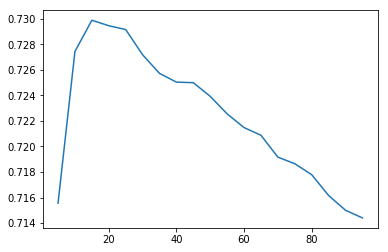

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(acc[:,0],acc[:,1])

In [31]:
conf_mat = confusion_matrix(testY, knn.predict(testX), testY.unique())

In [37]:
for i in range(7):
    print (conf_mat[i][i] / np.sum(conf_mat[i]),testY.unique()[i])

0.744634412514 sitting and typing
0.889722174876 active
0.584822286263 sitting still
0.164202745512 sitting with upper body movement
0.760221760222 lying
0.0 Private / Not Coded
0.0 kneeling


In [30]:
confusion_matrix(testY, knn.predict(testX), testY.unique()),testY.unique()

(array([[ 2047,   369,   275,    10,    48,     0,     0],
        [  303, 10440,   866,    50,    75,     0,     0],
        [  363,  1603,  3044,    58,   137,     0,     0],
        [  109,  1241,   209,   311,    24,     0,     0],
        [   92,   190,    63,     1,  1097,     0,     0],
        [    4,   162,    10,     1,     0,     0,     0],
        [    2,    97,     6,     0,     2,     0,     0]], dtype=int64),
 array(['sitting and typing', 'active', 'sitting still',
        'sitting with upper body movement', 'lying', 'Private / Not Coded',
        'kneeling'], dtype=object))

In [35]:
knn_dist = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_dist.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='distance')

In [36]:
conf_mat2 = confusion_matrix(testY, knn_dist.predict(testX), testY.unique())

In [ ]:
conf_mat2at2

In [38]:
for i in range(7):
    print (conf_mat2[i][i] / np.sum(conf_mat2[i]),testY.unique()[i])

0.748635867588 sitting and typing
0.881881711266 active
0.606916426513 sitting still
0.179514255544 sitting with upper body movement
0.767844767845 lying
0.0 Private / Not Coded
0.0 kneeling


In [39]:
knn_dist.score(testX, testY)

0.72988974215968083

In [41]:
f1_score(testY, knn_dist.predict(testX), average='weighted')

c:\users\andrew\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.70753265212438199

## Boosting!

In [1]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
adaboost = AdaBoostClassifier(n_estimators=200)
adaboost.fit(trainX, trainY)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None)

In [20]:
adaboost.score(testX, testY)

0.63735037968166808

In [21]:
conf_mat2 = confusion_matrix(testY, adaboost.predict(testX), testY.unique())
for i in range(7):
    print (conf_mat2[i][i] / np.sum(conf_mat2[i]),testY.unique()[i])

0.849096258932 active
0.4316982607 sitting still
0.635669673838 lying
0.560644924881 sitting and typing
0.0519693654267 sitting with upper body movement
0.00877192982456 kneeling
0.027027027027 Private / Not Coded


In [22]:
f1_score(testY, adaboost.predict(testX), average='weighted')

0.60955350678233555

In [23]:
conf_mat2

array([[10100,   957,   102,   322,   142,   243,    29],
       [ 2064,  2209,   469,   308,    53,    12,     2],
       [  267,   159,   916,    98,     0,     1,     0],
       [  426,   500,   257,  1530,    13,     3,     0],
       [ 1275,   256,    12,   168,    95,    20,     2],
       [  107,     1,     2,     3,     0,     1,     0],
       [  153,    18,     0,     4,     1,     4,     5]], dtype=int64)

## Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(n_estimators = 200,max_depth = 7)

In [26]:
grad_boost.fit(trainX, trainY)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [27]:
conf_mat2 = confusion_matrix(testY, grad_boost.predict(testX), testY.unique())
for i in range(7):
    print (conf_mat2[i][i] / np.sum(conf_mat2[i]),testY.unique()[i])

0.917108028583 active
0.675004885675 sitting still
0.834836918806 lying
0.78930010993 sitting and typing
0.310175054705 sitting with upper body movement
0.0 kneeling
0.00540540540541 Private / Not Coded


In [29]:
f1_score(testY, grad_boost.predict(testX), average='weighted')

0.76959799300646581

In [30]:
conf_mat2

array([[10909,   659,    37,   118,   148,    12,    12],
       [ 1326,  3454,    52,   169,   111,     2,     3],
       [  123,    89,  1203,    21,     2,     3,     0],
       [  284,   245,    27,  2154,    18,     0,     1],
       [ 1027,   181,     8,    43,   567,     2,     0],
       [  106,     5,     1,     1,     1,     0,     0],
       [  168,    13,     0,     1,     2,     0,     1]], dtype=int64)